# Analysis of Gspacer on HWMCC20 Rules

- Start: Thursday, October 29, 2020, 3:55:57 AM
- End: Thursday, October 29, 2020, 11:45:55 AM
- Duration: 7 hours, 49 minutes, and 58 seconds
- Number of benchmarks: 639
- Timeout: 900 seconds
- Branch: `gpsacer`
- Arguments: `-T:900 -st -v:1 fp.engine=spacer fp.print_statistics=true`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import List


# noinspection PyUnresolvedReferences
pd.set_option('display.max_rows', None)
# noinspection PyUnresolvedReferences
pd.set_option('display.max_colwidth', None)

sns.set(style='ticks', palette='Set2')
# noinspection PyUnresolvedReferences
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
out_dir: str = '../../out/gspacer.hwmcc20-rules.lilla-my.29_10_2020-t03-55-57'

df: pd.DataFrame = pd.read_csv('out.csv')

df['status'].fillna(value='(no status)', inplace=True)

timeout = 900
df['time'].fillna(value=timeout, inplace=True)
df.loc[df['status'] == 'unknown', 'time'] = timeout

# show a snapshot of data for visual validation
df.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,time_spacer_ctp,time_spacer_init_rules,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,8.0,8.0,59.0,8.0,38.0,51.0,NaN,...,0.0,0.07,0.06,1.00,31.67,0.90,30.75,1.40,23.88,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,5.0,5.0,55.0,4.0,25.0,19.0,NaN,...,NaN,0.07,0.06,1.01,20.80,0.23,20.55,1.47,14.25,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,8.0,8.0,36.0,9.0,6.0,71.0,1.0,...,0.0,0.06,0.06,0.32,14.13,2.20,11.91,0.49,8.92,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,3.0,3.0,3.0,1.0,NaN,4.0,NaN,...,NaN,0.01,0.00,0.00,0.03,0.00,0.02,0.00,0.00,NaN
4,array-array_swap.smt2,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,...,NaN,0.00,NaN,NaN,0.01,0.00,0.00,NaN,NaN,NaN


In [3]:
# quick overview of solved/unsolved instances
df[['status', 'index']].groupby('status').count()

,index
status,
(no status),5
sat,22
timeout,215
unknown,137
unsat,260


In [4]:
df.query('status == "(no status)"')[['index', 'status']]

,index,status
135,array-marlann_compute_fail1-p0.smt2,(no status)
138,array-marlann_compute_fail2-p1.smt2,(no status)
139,array-marlann_compute_fail2-p2.smt2,(no status)
632,bv-zipversa_composecrc_prf-p03.smt2,(no status)
634,bv-zipversa_composecrc_prf-p10.smt2,(no status)


In [5]:
# Find unknown results. Usually means that something went wrong, not just timeout.
unknown_df: pd.DataFrame = df.query('status == "unknown"')[['index', 'status']]

def get_error(index: str) -> str:
    with open(os.path.join(out_dir, index)) as f:
        return f.readline().strip()

unknown_df['error'] = unknown_df['index'].apply(get_error)
unknown_df.sort_values('error').head()

,index,status,error
315,bv-VexRiscv-regch0-15-p0.smt2,unknown,"(error ""query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)"")"
149,array-picorv32_mutAY_mem-p5.smt2,unknown,"(error ""query failed: Argument #b00000 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)"")"
331,bv-arbitrated_top_n3_w8_d128_e0.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
157,array-picorv32_mutBY_mem-p4.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
154,array-picorv32_mutBX_mem-p5.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"


In [6]:
unknown_df.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                                                                                                               first   
error                                                                                                                                                                                                  
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                                    bv-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b00000 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                              array-picorv32_mutAY_mem-p5.smt2   
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                         array-picorv32_mutAX_mem-p7.smt2   
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                           array-picorv32-check-p01.smt2   
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                      array-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                 array-zipcpu_zipcpu_dcache-p126.smt2   
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                         array-array_swap.smt2   
(error "query failed: Argument #x00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                              bv-marlann_compute_cp_fail1-p2.smt2   
(error "query failed: Argument #xffff at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                           array-zipcpu-zipmmu-p00.smt2   
(error "query failed: Stuck on a lemma")                                                                                                                array-dblclockfft_butterfly_ck2_r0-p188.smt2   
(error "query failed: operator is applied to arguments of the wrong sort")                                                                                        array-arbitrated_fifos_n2d8w8.smt2   

                                                                                                                                                              
                                                                                                                                                       count  
error                                                                                                                                                         
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                        1  
(error "query failed: Argument #b00000 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                     1  
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")               19  
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")              68  
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")            13  
(error "query failed: Argument #b111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ B

## HWMCC20 modelcheckers

In [7]:
pd.read_csv('http://fmv.jku.at/hwmcc20/hwmcc20-combined-all.txt', delim_whitespace=True)

,cnt,ok,sat,uns,dis,fld,to,mo,unk,real,time,space,max,best,uniq
avr,639,547,66,481,0,92,0,0,92,71456,1049649,2282407,49141,100,23
nuxmv,639,500,50,450,0,139,139,0,0,99664,339693,505974,6898,12,2
pono,639,386,58,328,0,253,219,22,12,63789,288937,596666,77761,38,1
cosa2,639,373,58,315,0,266,252,1,13,136153,537672,585138,14623,17,0
btormc,639,333,59,274,0,306,305,0,1,53822,53797,47550,2565,208,2
abc,324,262,56,206,0,62,62,0,0,36505,429078,344728,31293,29,1
abc17,324,262,55,207,0,62,62,0,0,39465,470045,352773,31820,10,1
pdtrav,324,245,45,200,0,79,76,0,3,74891,429930,713508,30090,8,2
avy,324,236,40,196,0,88,88,0,0,44055,437528,426064,14949,25,0
nmtip,324,210,17,193,26,88,88,0,0,24949,24933,17119,3117,142,13


In [8]:
# The values of the result column are unknown if all model checkers
# gives unknown, or if the number of model checkers that says sat
# and the number of those that say unsat tie. Otherwise, the values
# are sat or unsat based on the majority of the model checkers.
hwmcc20_results: pd.DataFrame = pd.read_csv('../hwmcc20-results.csv')
hwmcc20_results['index'] = hwmcc20_results['index'].apply(lambda idx: idx + '.smt2')
hwmcc20_results.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,unsat,0,5,0,-1,-1,-1.0,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,unsat,0,5,0,-1,-1,-1.0,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,unsat,0,4,0,-1,-1,-1.0,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,unknown,0,0,2,-1,-1,-1.0,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,unknown,0,0,2,-1,-1,-1.0,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [9]:
hwmcc20_results[['result', 'index']].groupby(['result']).count()

,index
result,
sat,84
unknown,43
unsat,512


## Compare Gspacer and HWMCC20 modelcheckers

In [10]:
m: pd.DataFrame = pd.merge(df, hwmcc20_results, on='index')
m.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,8.0,8.0,59.0,8.0,38.0,51.0,NaN,...,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,5.0,5.0,55.0,4.0,25.0,19.0,NaN,...,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,8.0,8.0,36.0,9.0,6.0,71.0,1.0,...,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,3.0,3.0,3.0,1.0,NaN,4.0,NaN,...,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,...,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [11]:
m[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) sat          3
            unknown      1
            unsat        1
sat         sat         12
            unsat       10
timeout     sat         35
            unknown     14
            unsat      166
unknown     sat         34
            unknown     27
            unsat       76
unsat       unknown      1
            unsat      259

In [12]:
# {sat|uns|unk}_count: The number of model checkers
#                      that gives {sat|unsat|unknown}
query_columns: List[str] = ['index', 'status', 'result', 'time', 'memory',
                            'sat_count', 'uns_count', 'unk_count']
m.query('status == "sat" & result == "unsat"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count
443,bv-miim.smt2,sat,unsat,0.01,6.45,0,9,1
582,bv-stack-p2.smt2,sat,unsat,0.03,8.16,0,10,1
585,bv-vcegar_arrays_itc99_b12_p2.smt2,sat,unsat,0.03,7.58,0,1,1
424,bv-elevator.4.prop1-func-interl.smt2,sat,unsat,0.04,8.15,0,9,1
559,bv-rast-p11.smt2,sat,unsat,0.05,8.25,0,10,1
554,bv-rast-p00.smt2,sat,unsat,0.06,8.84,0,6,1
560,bv-rast-p14.smt2,sat,unsat,0.08,13.11,0,2,1
561,bv-rast-p16.smt2,sat,unsat,0.08,13.11,0,4,1
562,bv-rast-p17.smt2,sat,unsat,0.09,11.72,0,1,1
444,bv-msmie.3.prop1-func-interl.smt2,sat,unsat,0.17,22.51,0,5,1


For `bv-vcegar_arrays_itc99_b12_p2.smt2` and `bv-rast-p17.smt2`, only nmtip says unsat.

In [13]:
m.query('status == "unsat" & result == "sat"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count


In [14]:
m.query('status == "sat" & result == "unknown"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count


In [15]:
m.query('status == "unsat" & result == "unknown"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count
168,array-simple-stack-pred1.smt2,unsat,unknown,0.07,7.73,0,0,1


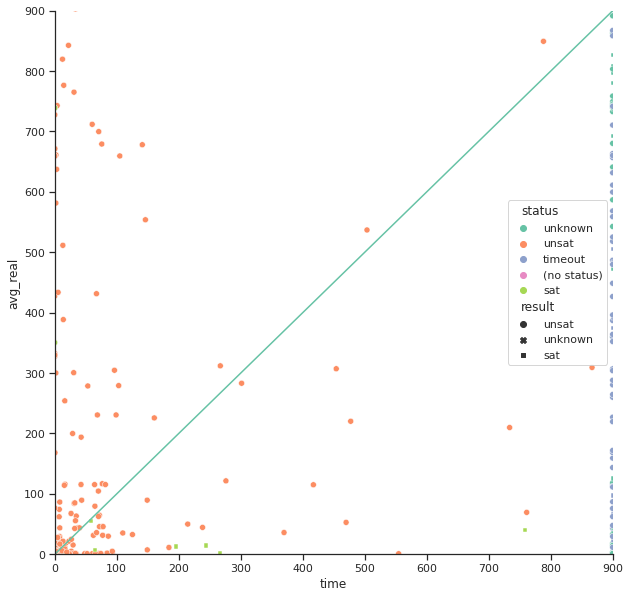

In [16]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)

## BV

In [17]:
# noinspection PyUnresolvedReferences
df_bv: pd.DataFrame = df[df['index'].str.startswith('bv-')]
df_bv.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,time_spacer_ctp,time_spacer_init_rules,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_is_reach
315,bv-VexRiscv-regch0-15-p0.smt2,NaN,NaN,5.0,4.0,8.0,5.0,1.0,14.0,NaN,...,NaN,0.09,0.09,0.03,1.40,0.35,1.03,0.04,0.50,NaN
316,bv-VexRiscv-regch0-20-p0.smt2,NaN,NaN,5.0,5.0,17.0,4.0,10.0,19.0,NaN,...,NaN,0.09,0.09,0.18,6.04,0.72,5.31,0.26,3.60,NaN
317,bv-VexRiscv-regch0-30-p1.smt2,NaN,NaN,7.0,6.0,48.0,8.0,31.0,60.0,2.0,...,0.00,0.09,0.08,2.06,33.31,2.57,30.73,2.44,22.11,NaN
318,bv-anderson.3.prop1-back-serstep.smt2,4.0,NaN,4.0,4.0,16.0,3.0,NaN,9.0,NaN,...,NaN,0.01,0.00,0.01,16.50,0.30,16.19,0.03,11.74,1.31
319,bv-arbitrated_top_n2_w128_d32_e0.smt2,NaN,NaN,12.0,11.0,667.0,791.0,NaN,2577.0,1.0,...,1.09,0.10,0.10,30.73,740.75,105.31,635.40,33.61,515.87,NaN


In [18]:
# quick overview of solved/unsolved instances
df_bv[['status', 'index']].groupby(['status']).count()

,index
status,
(no status),2
sat,22
timeout,179
unknown,43
unsat,78


In [19]:
df_bv.query('status == "(no status)"')[['index', 'status']]

,index,status
632,bv-zipversa_composecrc_prf-p03.smt2,(no status)
634,bv-zipversa_composecrc_prf-p10.smt2,(no status)


In [20]:
# noinspection PyUnresolvedReferences
unknown_df_bv: pd.DataFrame = unknown_df[unknown_df['index'].str.startswith('bv-')]
unknown_df_bv.head()

,index,status,error
315,bv-VexRiscv-regch0-15-p0.smt2,unknown,"(error ""query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)"")"
316,bv-VexRiscv-regch0-20-p0.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
317,bv-VexRiscv-regch0-30-p1.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
326,bv-arbitrated_top_n3_w16_d128_e0.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
327,bv-arbitrated_top_n3_w16_d32_e0.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"


In [21]:
unknown_df_bv.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                                                                                                first   
error                                                                                                                                                                                   
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                     bv-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")     bv-arbitrated_top_n3_w16_d128_e0.smt2   
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")    bv-arbitrated_top_n5_w128_d64_e0.smt2   
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")          bv-VexRiscv-regch0-20-p0.smt2   
(error "query failed: Argument #x00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")               bv-marlann_compute_cp_fail1-p2.smt2   

                                                                                                                                                      
                                                                                                                                               count  
error                                                                                                                                                 
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                1  
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")       12  
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")      17  
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")    10  
(error "query failed: Argument #x00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                3

In [22]:
# noinspection PyUnresolvedReferences
hwmcc20_results_bv: pd.DataFrame = hwmcc20_results[hwmcc20_results['index'].str.startswith('bv-')]
hwmcc20_results_bv.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
315,bv-VexRiscv-regch0-15-p0.smt2,unsat,0,8,1,-1,-1,-1.000000,6.28,3600.11,680.350909,6.19,NaN,91.0,16828.0,4166.545455,4722.890000,35991.59
316,bv-VexRiscv-regch0-20-p0.smt2,unsat,0,8,1,-1,-1,-1.000000,52.68,3600.10,891.460909,52.59,NaN,161.0,31820.0,10455.272727,6538.323636,35992.53
317,bv-VexRiscv-regch0-30-p1.smt2,unsat,0,6,1,-1,-1,-1.000000,254.53,3600.11,2101.825455,254.49,NaN,722.0,110681.0,28088.818182,14905.270909,35903.45
318,bv-anderson.3.prop1-back-serstep.smt2,sat,11,0,0,-1,4,1.272727,0.03,3.13,0.594545,0.00,NaN,0.0,1753.0,309.363636,0.810909,4.54
319,bv-arbitrated_top_n2_w128_d32_e0.smt2,sat,5,0,0,-1,-1,-1.000000,591.76,3600.11,2364.781818,1647.68,NaN,225.0,14825.0,5186.272727,15454.903636,44492.40


In [23]:
m_bv: pd.DataFrame = pd.merge(df_bv, hwmcc20_results_bv, on='index')
m_bv.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,bv-VexRiscv-regch0-15-p0.smt2,NaN,NaN,5.0,4.0,8.0,5.0,1.0,14.0,NaN,...,6.28,3600.11,680.350909,6.19,NaN,91.0,16828.0,4166.545455,4722.890000,35991.59
1,bv-VexRiscv-regch0-20-p0.smt2,NaN,NaN,5.0,5.0,17.0,4.0,10.0,19.0,NaN,...,52.68,3600.10,891.460909,52.59,NaN,161.0,31820.0,10455.272727,6538.323636,35992.53
2,bv-VexRiscv-regch0-30-p1.smt2,NaN,NaN,7.0,6.0,48.0,8.0,31.0,60.0,2.0,...,254.53,3600.11,2101.825455,254.49,NaN,722.0,110681.0,28088.818182,14905.270909,35903.45
3,bv-anderson.3.prop1-back-serstep.smt2,4.0,NaN,4.0,4.0,16.0,3.0,NaN,9.0,NaN,...,0.03,3.13,0.594545,0.00,NaN,0.0,1753.0,309.363636,0.810909,4.54
4,bv-arbitrated_top_n2_w128_d32_e0.smt2,NaN,NaN,12.0,11.0,667.0,791.0,NaN,2577.0,1.0,...,591.76,3600.11,2364.781818,1647.68,NaN,225.0,14825.0,5186.272727,15454.903636,44492.40


In [24]:
m_bv[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) unknown      1
            unsat        1
sat         sat         12
            unsat       10
timeout     sat         29
            unknown     12
            unsat      138
unknown     sat         24
            unknown      8
            unsat       11
unsat       unsat       78

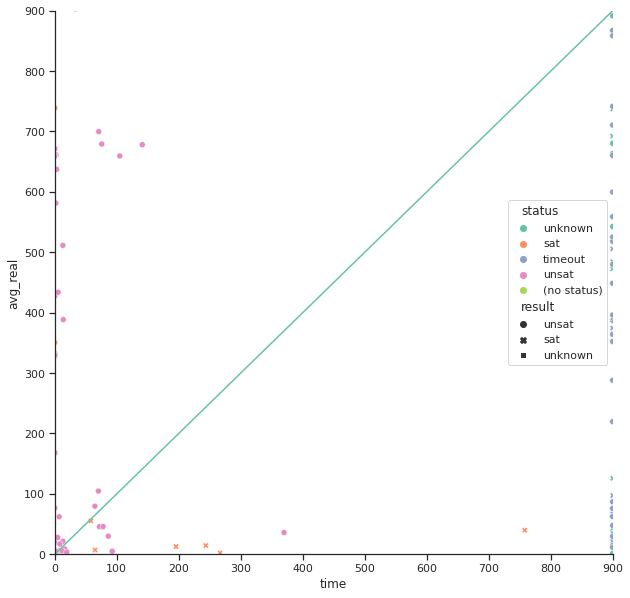

In [25]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m_bv)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)

## Array

In [26]:
# noinspection PyUnresolvedReferences
df_array: pd.DataFrame = df[df['index'].str.startswith('array-')]
df_array.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,time_spacer_ctp,time_spacer_init_rules,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,8.0,8.0,59.0,8.0,38.0,51.0,NaN,...,0.0,0.07,0.06,1.00,31.67,0.90,30.75,1.40,23.88,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,5.0,5.0,55.0,4.0,25.0,19.0,NaN,...,NaN,0.07,0.06,1.01,20.80,0.23,20.55,1.47,14.25,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,8.0,8.0,36.0,9.0,6.0,71.0,1.0,...,0.0,0.06,0.06,0.32,14.13,2.20,11.91,0.49,8.92,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,3.0,3.0,3.0,1.0,NaN,4.0,NaN,...,NaN,0.01,0.00,0.00,0.03,0.00,0.02,0.00,0.00,NaN
4,array-array_swap.smt2,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,...,NaN,0.00,NaN,NaN,0.01,0.00,0.00,NaN,NaN,NaN


In [27]:
# quick overview of solved/unsolved instances
df_array[['status', 'index']].groupby('status').count()

,index
status,
(no status),3
timeout,36
unknown,94
unsat,182


In [28]:
df_array.query('status == "(no status)"')[['index', 'status']]

,index,status
135,array-marlann_compute_fail1-p0.smt2,(no status)
138,array-marlann_compute_fail2-p1.smt2,(no status)
139,array-marlann_compute_fail2-p2.smt2,(no status)


In [29]:
# noinspection PyUnresolvedReferences
unknown_df_array: pd.DataFrame = unknown_df[unknown_df['index'].str.startswith('array-')]
unknown_df_array.head()

,index,status,error
0,array-VexRiscv-regch0-15-p0.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
1,array-VexRiscv-regch0-15-p1.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
2,array-VexRiscv-regch0-20-p0.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))"")"
3,array-arbitrated_fifos_n2d8w8.smt2,unknown,"(error ""query failed: operator is applied to arguments of the wrong sort"")"
4,array-array_swap.smt2,unknown,"(error ""query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"


In [30]:
unknown_df.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                                                                                                               first   
error                                                                                                                                                                                                  
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                                    bv-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b00000 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                              array-picorv32_mutAY_mem-p5.smt2   
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                         array-picorv32_mutAX_mem-p7.smt2   
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                           array-picorv32-check-p01.smt2   
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                      array-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                 array-zipcpu_zipcpu_dcache-p126.smt2   
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                         array-array_swap.smt2   
(error "query failed: Argument #x00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                              bv-marlann_compute_cp_fail1-p2.smt2   
(error "query failed: Argument #xffff at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")                           array-zipcpu-zipmmu-p00.smt2   
(error "query failed: Stuck on a lemma")                                                                                                                array-dblclockfft_butterfly_ck2_r0-p188.smt2   
(error "query failed: operator is applied to arguments of the wrong sort")                                                                                        array-arbitrated_fifos_n2d8w8.smt2   

                                                                                                                                                              
                                                                                                                                                       count  
error                                                                                                                                                         
(error "query failed: Argument #b00 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                        1  
(error "query failed: Argument #b00000 at position 1 does not match declaration (declare-fun bvule ((_ BitVec 1) (_ BitVec 1)) Bool)")                     1  
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")               19  
(error "query failed: Argument #b111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")              68  
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ BitVec 1)) (_ BitVec 1))")            13  
(error "query failed: Argument #b111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 1) (_ B

In [31]:
# noinspection PyUnresolvedReferences
hwmcc20_results_array: pd.DataFrame = hwmcc20_results[hwmcc20_results['index'].str.startswith('array-')]
hwmcc20_results_array.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,unsat,0,5,0,-1,-1,-1.0,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,unsat,0,5,0,-1,-1,-1.0,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,unsat,0,4,0,-1,-1,-1.0,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,unknown,0,0,2,-1,-1,-1.0,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,unknown,0,0,2,-1,-1,-1.0,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [32]:
m_array: pd.DataFrame = pd.merge(df_array, hwmcc20_results_array, on='index')
m_array.head()

,index,SPACER_cex_depth,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_num_active_lemmas,SPACER_num_ctp_blocked,SPACER_num_invariants,SPACER_num_is_invariant,SPACER_num_lemma_jumped,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,8.0,8.0,59.0,8.0,38.0,51.0,NaN,...,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,5.0,5.0,55.0,4.0,25.0,19.0,NaN,...,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,8.0,8.0,36.0,9.0,6.0,71.0,1.0,...,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,NaN,3.0,3.0,3.0,1.0,NaN,4.0,NaN,...,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,...,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [33]:
m_array[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) sat          3
timeout     sat          6
            unknown      2
            unsat       28
unknown     sat         10
            unknown     19
            unsat       65
unsat       unknown      1
            unsat      181

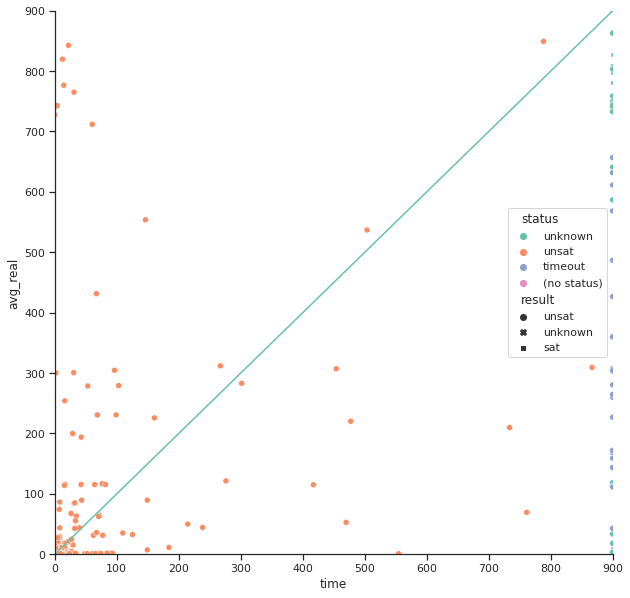

In [34]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m_array)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)